<a href="https://colab.research.google.com/github/katyreena/tensor-contraction/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Домашнее задание 
## Группа: М8О-107М-22
## Выполнила: Заяц Екатерина Евгеньевна

#Дано

Имеются 5 тензеров:  A, B, C, D, E, которые соединены как на рисунке.  
Задача: осуществить свертку и выполнить ее 3мя способами:  
1) свернуть, используя цикл for  
2) вручную  используя функции reshape, матричное произведение  
3) используя пакет ncon  
Сравнить эти способы по:  
а) объему написания кода  
б) по времени исполнения  
в) проверить, что эти способы являются равнозначными (сравнения тензеров можно произвести с помощью пакета numpy )  
Итогом свертки будет некий тензор R валентности 3

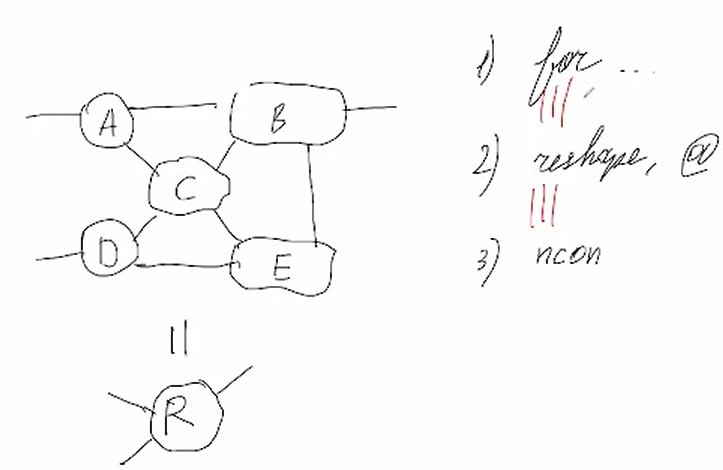

In [ ]:
!pip install ncon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from ncon import ncon
import time 

In [ ]:
A = np.random.rand(2, 2, 2)
B = np.random.rand(2, 2, 2, 2)
C = np.random.rand(2, 2, 2, 2)
E = np.random.rand(2, 2, 2)
D = np.random.rand(2, 2, 2)

#Способ 1

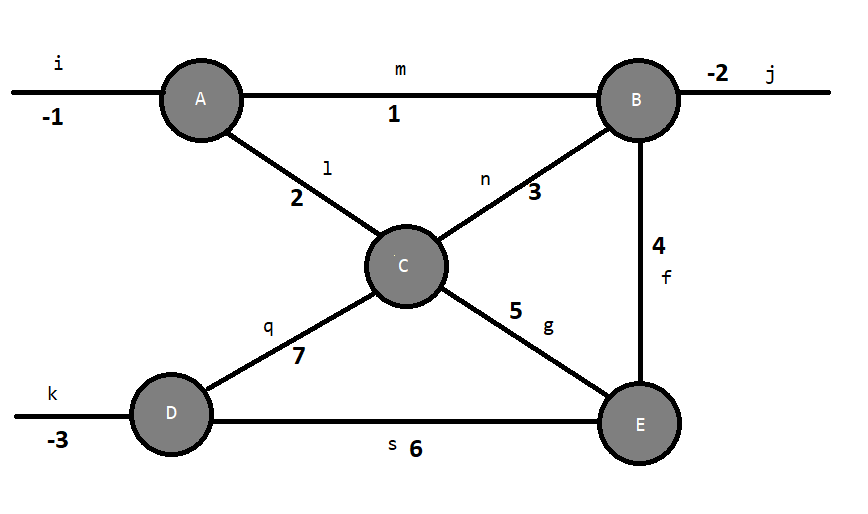

In [ ]:
start = time.time()
result_for = np.zeros((2, 2, 2))
for i in range(2):
  for j in range(2):
    for k in range(2):
      for m in range(2):
        for l in range(2):
          for n in range(2):
            for f in range(2):
              for g in range(2):
                for q in range(2):
                  for s in range(2):
                    result_for[i, j, k] += A[m, l, i] * B[m, n, f, j] * C[l, n, g, q] * E[f, g ,s] * D[s, q, k]
time_for = time.time() - start 
print("Валентность(правильный ответ - 3): ", len(result_for.shape))
print("Результирующий тензор:\n", result_for)

Валентность(правильный ответ - 3):  3
Результирующий тензор:
 [[[8.37004535 5.86622971]
  [5.42346009 3.8424741 ]]

 [[8.12549027 5.69453555]
  [5.25120369 3.73057829]]]


#Способ 2

In [ ]:
start = time.time()
result_ncon = ncon((A, B, C, D, E), [[1, 2, -1], [1, 3, 4, -2], [2, 3, 5, 7], [6, 7, -3], [4, 5, 6]])

time_ncon = time.time()-start
print("Валентность(правильный ответ - 3): ", len(result_ncon.shape))
print("Результирующий тензор:\n", result_ncon)

Валентность(правильный ответ - 3):  3
Результирующий тензор:
 [[[8.37004535 5.86622971]
  [5.42346009 3.8424741 ]]

 [[8.12549027 5.69453555]
  [5.25120369 3.73057829]]]


#Способ 3

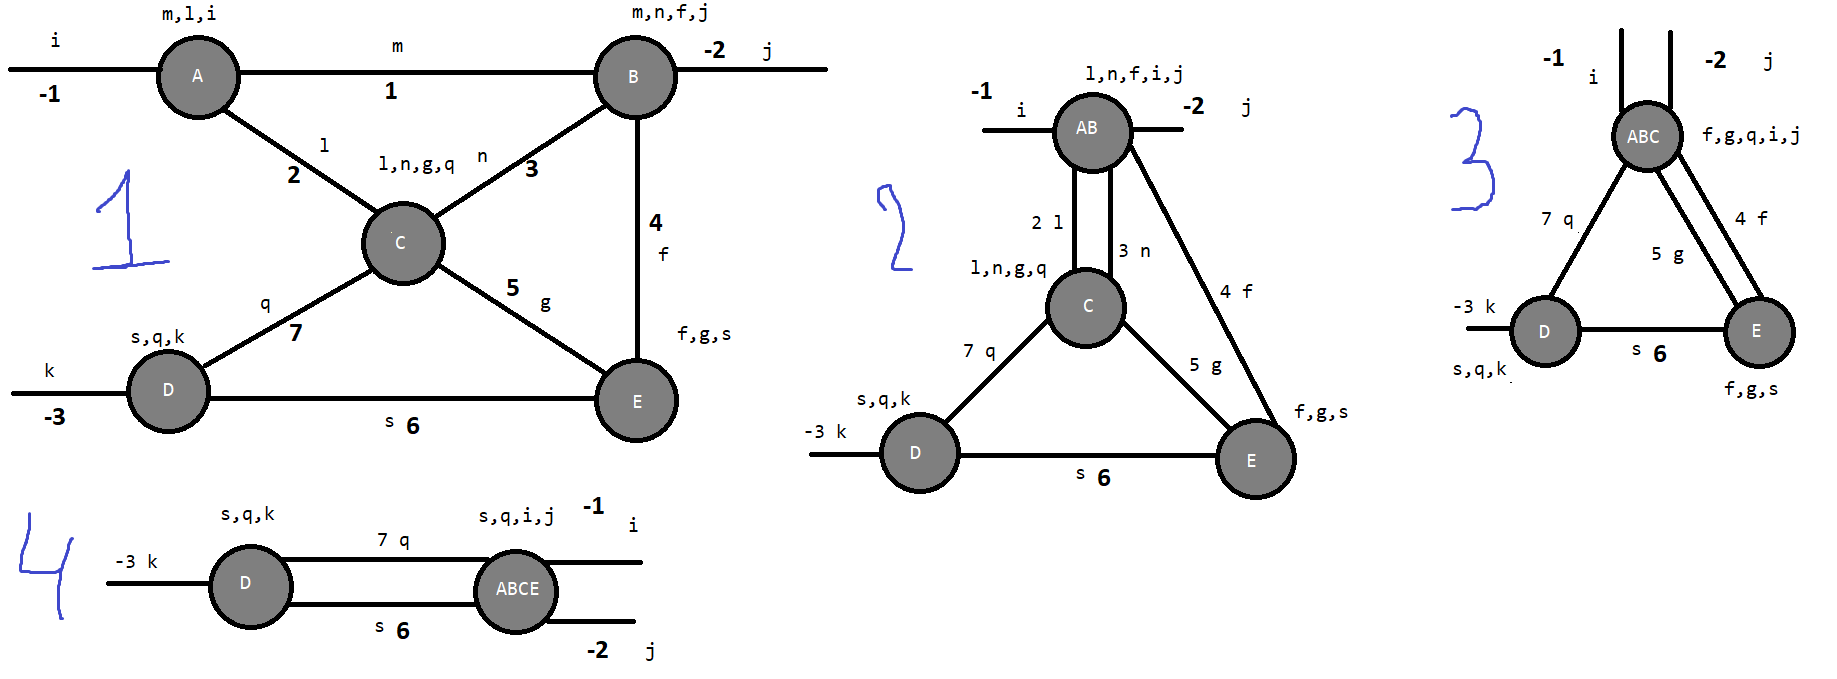

In [ ]:
start = time.time()

A1 = A.reshape(2, 4).T
B1 = B.reshape(2, 8)
AB = A1 @ B1

AB1 = AB.reshape(4, 8).T
C1 = C.reshape(4, 4)
ABC = AB1 @ C1

ABC1 = ABC.reshape(4, 8).T
E1 = E.reshape(4, 2)
ABCE = ABC1 @ E1

ABCE1 = ABCE.reshape(4, 4)
D1 = D.reshape(4, 2)
ABCED = (ABCE1 @ D1).reshape(2, 2, 2)

time_reshape = time.time() - start 
ABCED

array([[[6.1587228 , 4.45345173],
        [8.87867502, 6.33347696]],

       [[3.73062987, 2.73883103],
        [5.36643853, 3.87952911]]])

In [ ]:
print("Время выполнения работы с for = ", time_for)
print("Время выполнения работы с reshape = ", time_reshape)
print("Время выполнения работы с ncon = ", time_ncon)

Время выполнения работы с for =  0.004338264465332031
Время выполнения работы с reshape =  0.0006735324859619141
Время выполнения работы с ncon =  0.001753091812133789
